##  Surprise Housing Assignment
### Kishor Kunal | DS27

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 81)

### Data understanding, preparation and EDA

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#checking null data
pd.options.display.max_rows = 100
(((housing.isna().sum()/len(housing))*100))

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

### Handling missing values

In [6]:
housing.GarageCond.value_counts()# NA means no garage

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [7]:
housing.GarageCond.fillna('NoGarage',inplace=True)

In [8]:
housing.GarageQual.value_counts() # NA means no garage

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [9]:
housing.GarageQual.fillna('NoGarage',inplace=True)

In [10]:
housing.GarageFinish.value_counts() # NA means no garage

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [11]:
housing.GarageType.fillna('NoGarage',inplace=True)

In [12]:
housing.GarageType.value_counts() # NA means no garage

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [13]:
housing.GarageType.fillna('NoGarage',inplace=True)

In [14]:
housing.Electrical.value_counts() 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [15]:
housing.Electrical.fillna('SBrkr',inplace=True)

In [16]:
housing.BsmtQual.value_counts() # NA means no basement

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [17]:
housing.BsmtQual.fillna('No_Basement',inplace=True)
housing.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [18]:
housing.MasVnrArea.fillna(0.0,inplace=True)

In [19]:
housing.MasVnrType.value_counts() # Masonry veneer type - NA means NONE

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [20]:
housing.MasVnrType.fillna('None',inplace=True)
housing.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [21]:
housing.Alley.value_counts() #Type of alley access to property -  NA means No alley access

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [22]:
housing.Alley.fillna('NoAlley',inplace=True)

In [23]:
housing.FireplaceQu.value_counts() #Fireplace quality -  NA means No_Fireplace

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [24]:
housing.FireplaceQu.fillna('No_Fireplace',inplace=True)

In [25]:
housing.PoolQC.value_counts() #Pool quality NA means No Pool

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [26]:
housing.PoolQC.fillna('No_Pool',inplace=True)

In [27]:
housing.Fence.value_counts() #Fence quality - NA means No Fence

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [28]:
housing.Fence.fillna('No_Fence',inplace=True)

In [29]:
housing.LotFrontage.fillna(0,inplace=True)

In [30]:
housing.BsmtCond.value_counts() #Fence quality - NA means No Basement

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [31]:
housing.BsmtCond.fillna('NA',inplace=True) # NA means no basement
housing.BsmtExposure.fillna('NA',inplace=True) # NA means no basement
housing.BsmtFinType1.fillna('NA',inplace=True)# NA means no basement
housing.BsmtFinType2.fillna('NA',inplace=True)# NA means no basement
housing.GarageYrBlt.fillna(0,inplace=True) # 0 means no garage
housing.GarageFinish.fillna('NA',inplace=True)  # NA means no garage

In [32]:
housing.MiscFeature.value_counts() # Miscellaneous feature not covered in other categories : NA means none

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [33]:
housing.MiscFeature.fillna('NA',inplace=True)# NA means no feature

In [34]:
# re-checking null data
housing.drop('Id',inplace=True,axis=1)
pd.options.display.max_rows = 100
(((housing.isna().sum()/len(housing))*100))

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

 ###### ::::: Null data fixed
 

#### Checking numeric columns which can be treated as Catagorical variables

In [35]:
pd.options.display.max_columns=100
housing_num = housing.select_dtypes(['int64','float64'])
housing_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [36]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [37]:
#convertung year columns to year since 2021
housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']] = housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].apply(lambda x:2021-x)


In [38]:
housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,18,18,18.0,13
1,45,45,45.0,14
2,20,19,20.0,13
3,106,51,23.0,15
4,21,21,21.0,13


In [39]:
#extracting numeric columns which can be treated as Categorical variables
pd.options.display.max_columns=100
housing_num_categorical = housing_num[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
 'TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
housing_num_categorical.head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,60,7,5,1,1,3,1,8,0,2,2,2003,2003,2003.0,2008
1,20,6,8,0,0,3,1,6,1,2,5,1976,1976,1976.0,2007
2,60,7,5,1,1,3,1,6,1,2,9,2001,2002,2001.0,2008
3,70,7,5,1,0,3,1,7,1,3,2,1915,1970,1998.0,2006
4,60,8,5,1,1,4,1,9,1,3,12,2000,2000,2000.0,2008


In [40]:
# dropping columns which we'll be using as categorical variables
housing_num =housing_num.drop(housing_num_categorical.columns,axis=1) 
housing_num.shape

(1460, 22)

### Checking Outliers

In [41]:
housing_num.shape

(1460, 22)

In [42]:
housing[housing_num.columns].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.057534,1.565068,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.238753,0.550916,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,0.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,0.000000,2.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,2.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,137.410000,37567.640000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


In [43]:
from scipy import stats
housing = housing[(np.abs(stats.zscore(housing_num[housing_num.columns])) < 3).all(axis=1)] #using z-score
housing.shape

(1105, 80)

In [44]:
housing[housing_num.columns].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.0,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.0,1105.000000,1105.000000
mean,56.506787,9242.356561,80.948416,411.696833,17.864253,576.984615,1006.545701,1108.861538,323.844344,0.265158,1432.971041,0.0,1.554751,458.145701,85.356561,40.503167,14.850679,0.020814,5.819910,0.0,14.980995,170145.541176
std,31.303508,3798.844600,130.443704,412.765009,73.947578,431.872506,381.370051,334.242728,407.183886,4.457052,430.659018,0.0,0.527279,202.537109,106.653830,53.110258,43.206367,0.691905,28.356094,0.0,100.810666,63756.857147
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,35311.000000
25%,43.000000,7200.000000,0.000000,0.000000,0.000000,242.000000,780.000000,864.000000,0.000000,0.000000,1097.000000,0.0,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,127000.000000
50%,63.000000,9098.000000,0.000000,370.000000,0.000000,496.000000,956.000000,1050.000000,0.000000,0.000000,1414.000000,0.0,2.000000,470.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.0,0.000000,157000.000000
75%,77.000000,11003.000000,137.000000,695.000000,0.000000,823.000000,1237.000000,1318.000000,704.000000,0.000000,1709.000000,0.0,2.000000,576.000000,160.000000,61.000000,0.000000,0.000000,0.000000,0.0,0.000000,202665.000000
90%,89.000000,13167.400000,286.600000,1000.000000,0.000000,1245.400000,1523.800000,1607.600000,896.000000,0.000000,1985.400000,0.0,2.000000,712.000000,238.600000,120.000000,78.800000,0.000000,0.000000,0.0,0.000000,260000.000000
95%,98.000000,14857.200000,360.000000,1200.000000,160.400000,1466.200000,1685.400000,1718.800000,1062.400000,0.000000,2221.200000,0.0,2.000000,834.000000,294.400000,154.800000,128.800000,0.000000,0.000000,0.0,0.000000,304300.000000
99%,123.920000,22400.400000,512.880000,1444.920000,434.400000,1694.000000,1901.760000,2000.000000,1287.920000,0.000000,2575.920000,0.0,2.000000,907.760000,401.680000,223.600000,188.840000,0.000000,162.920000,0.0,500.000000,361842.240000


#### Checking corr on numerical data

In [45]:
housing[housing_num.columns].corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.268630,0.076980,0.004085,-0.040982,0.180639,0.201034,0.233504,0.015878,-0.063860,0.195578,NaN,0.125579,0.191154,0.007626,0.087950,0.044302,0.008169,0.036128,NaN,-0.027061,0.216256
LotArea,0.268630,1.000000,0.070296,0.171350,-0.008379,0.079087,0.273391,0.358971,0.071710,-0.064908,0.345734,NaN,0.155652,0.278096,0.149915,0.082149,-0.044968,0.007884,0.056621,NaN,0.029010,0.337598
MasVnrArea,0.076980,0.070296,1.000000,0.205158,-0.050295,0.090665,0.314966,0.294785,0.087377,-0.036952,0.311020,NaN,0.234385,0.328373,0.158666,0.127232,-0.144682,-0.018685,-0.021456,NaN,-0.053633,0.394962
BsmtFinSF1,0.004085,0.171350,0.205158,1.000000,0.014175,-0.579010,0.429385,0.348199,-0.196756,-0.059392,0.083599,NaN,0.001960,0.228270,0.206788,0.046740,-0.115097,-0.027990,0.037774,NaN,-0.007200,0.370323
BsmtFinSF2,-0.040982,-0.008379,-0.050295,0.014175,1.000000,-0.177675,0.008038,-0.020103,-0.073996,-0.014385,-0.085713,NaN,-0.114082,-0.029315,0.055264,-0.089476,-0.002152,-0.007274,0.029738,NaN,-0.016747,-0.086167
BsmtUnfSF,0.180639,0.079087,0.090665,-0.579010,-0.177675,1.000000,0.471298,0.352396,-0.035221,-0.011791,0.240078,NaN,0.282380,0.177745,-0.010323,0.162679,-0.005523,0.049572,-0.000637,NaN,-0.073882,0.200098
TotalBsmtSF,0.201034,0.273391,0.314966,0.429385,0.008038,0.471298,1.000000,0.772027,-0.267186,-0.080422,0.345731,NaN,0.299775,0.442660,0.222837,0.217460,-0.131243,0.024432,0.045929,NaN,-0.094706,0.610696
1stFlrSF,0.233504,0.358971,0.294785,0.348199,-0.020103,0.352396,0.772027,1.000000,-0.338054,-0.071811,0.455749,NaN,0.350216,0.444439,0.199363,0.159710,-0.128562,0.018660,0.060337,NaN,-0.045864,0.560720
2ndFlrSF,0.015878,0.071710,0.087377,-0.196756,-0.073996,-0.035221,-0.267186,-0.338054,1.000000,0.044477,0.683580,NaN,0.396410,0.116543,0.060144,0.219329,0.016821,-0.023947,-0.012617,NaN,-0.016907,0.290776
LowQualFinSF,-0.063860,-0.064908,-0.036952,-0.059392,-0.014385,-0.011791,-0.080422,-0.071811,0.044477,1.000000,-0.003332,NaN,0.050282,0.016636,-0.035536,0.136242,-0.020467,-0.001791,-0.012221,NaN,-0.008849,-0.017504


In [46]:
housing.BsmtHalfBath.value_counts()

0    1105
Name: BsmtHalfBath, dtype: int64

In [47]:
housing.PoolArea.value_counts()

0    1105
Name: PoolArea, dtype: int64

In [48]:
housing.drop(['PoolArea','BsmtHalfBath'],inplace=True,axis=1) # dropping these cols as after handling outliers all values are 0

In [49]:
housing_num.drop(['PoolArea','BsmtHalfBath'],inplace=True,axis=1)

In [50]:
housing[housing_num.columns].corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
LotFrontage,1.000000,0.268630,0.076980,0.004085,-0.040982,0.180639,0.201034,0.233504,0.015878,-0.063860,0.195578,0.125579,0.191154,0.007626,0.087950,0.044302,0.008169,0.036128,-0.027061,0.216256
LotArea,0.268630,1.000000,0.070296,0.171350,-0.008379,0.079087,0.273391,0.358971,0.071710,-0.064908,0.345734,0.155652,0.278096,0.149915,0.082149,-0.044968,0.007884,0.056621,0.029010,0.337598
MasVnrArea,0.076980,0.070296,1.000000,0.205158,-0.050295,0.090665,0.314966,0.294785,0.087377,-0.036952,0.311020,0.234385,0.328373,0.158666,0.127232,-0.144682,-0.018685,-0.021456,-0.053633,0.394962
BsmtFinSF1,0.004085,0.171350,0.205158,1.000000,0.014175,-0.579010,0.429385,0.348199,-0.196756,-0.059392,0.083599,0.001960,0.228270,0.206788,0.046740,-0.115097,-0.027990,0.037774,-0.007200,0.370323
BsmtFinSF2,-0.040982,-0.008379,-0.050295,0.014175,1.000000,-0.177675,0.008038,-0.020103,-0.073996,-0.014385,-0.085713,-0.114082,-0.029315,0.055264,-0.089476,-0.002152,-0.007274,0.029738,-0.016747,-0.086167
BsmtUnfSF,0.180639,0.079087,0.090665,-0.579010,-0.177675,1.000000,0.471298,0.352396,-0.035221,-0.011791,0.240078,0.282380,0.177745,-0.010323,0.162679,-0.005523,0.049572,-0.000637,-0.073882,0.200098
TotalBsmtSF,0.201034,0.273391,0.314966,0.429385,0.008038,0.471298,1.000000,0.772027,-0.267186,-0.080422,0.345731,0.299775,0.442660,0.222837,0.217460,-0.131243,0.024432,0.045929,-0.094706,0.610696
1stFlrSF,0.233504,0.358971,0.294785,0.348199,-0.020103,0.352396,0.772027,1.000000,-0.338054,-0.071811,0.455749,0.350216,0.444439,0.199363,0.159710,-0.128562,0.018660,0.060337,-0.045864,0.560720
2ndFlrSF,0.015878,0.071710,0.087377,-0.196756,-0.073996,-0.035221,-0.267186,-0.338054,1.000000,0.044477,0.683580,0.396410,0.116543,0.060144,0.219329,0.016821,-0.023947,-0.012617,-0.016907,0.290776
LowQualFinSF,-0.063860,-0.064908,-0.036952,-0.059392,-0.014385,-0.011791,-0.080422,-0.071811,0.044477,1.000000,-0.003332,0.050282,0.016636,-0.035536,0.136242,-0.020467,-0.001791,-0.012221,-0.008849,-0.017504


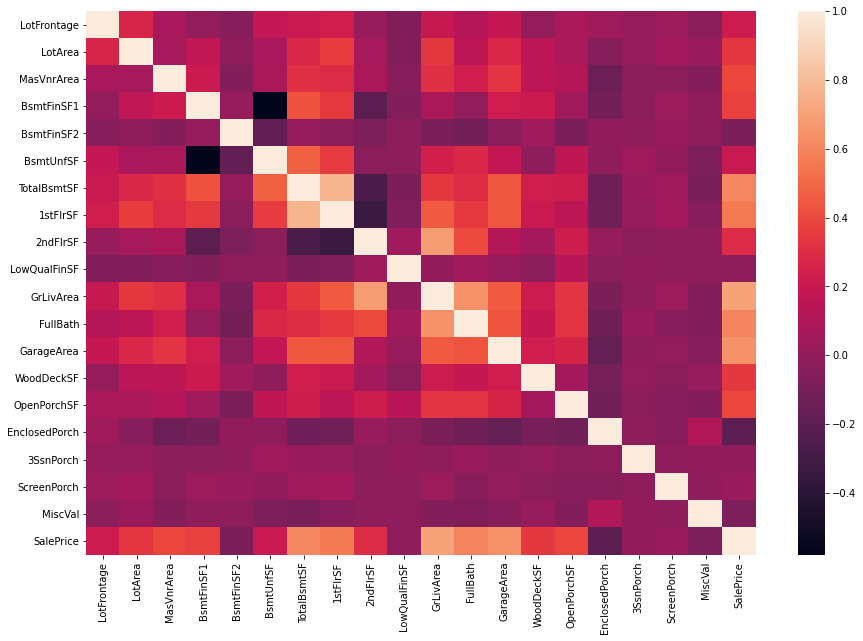

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(housing[housing_num.columns].corr())
plt.show()

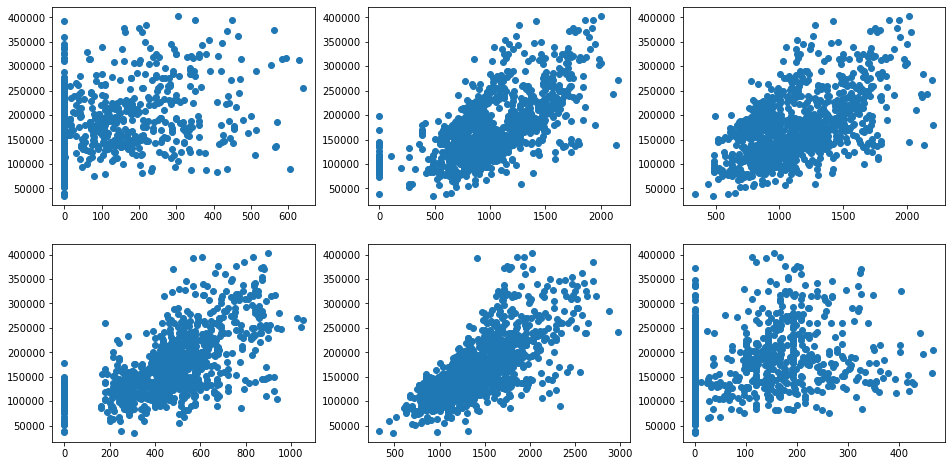

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(housing.MasVnrArea,housing.SalePrice,)
plt.subplot(2,3,2)
plt.scatter(housing.TotalBsmtSF,housing.SalePrice)
plt.subplot(2,3,3)
plt.scatter(housing['1stFlrSF'],housing.SalePrice)
plt.subplot(2,3,4)
plt.scatter(housing['GarageArea'],housing.SalePrice)
plt.subplot(2,3,5)
plt.scatter(housing['GrLivArea'],housing.SalePrice)
plt.subplot(2,3,6)
plt.scatter(housing['WoodDeckSF'],housing.SalePrice)
plt.show()

### Model Building

In [53]:
housing.shape

(1105, 78)

In [54]:
housing['BsmtQual'] = housing.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtCond'] = housing.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['HeatingQC'] = housing.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['CentralAir'] = housing.CentralAir.map({'N':0,'Y':1})
housing['KitchenQual'] = housing.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['GarageFinish'] = housing.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing['GarageQual'] = housing.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['GarageCond'] = housing.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['ExterCond'] = housing.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['LotShape'] = housing.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing['LandSlope'] = housing.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housing['ExterQual'] = housing.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['BsmtExposure'] = housing.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['BsmtFinType1'] = housing.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['BsmtFinType2'] = housing.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

In [55]:
housing[['BsmtQual','BsmtCond','HeatingQC','CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond',
        'LotShape','LandSlope','ExterQual','BsmtExposure','BsmtFinType1','BsmtFinType2']].head()

,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape,LandSlope,ExterQual,BsmtExposure,BsmtFinType1,BsmtFinType2
0,4.0,3,4,1,3,2,3.0,3.0,2,3,0,3,1,6,1
2,4.0,3,4,1,3,2,3.0,3.0,2,0,0,3,2,6,1
4,4.0,3,4,1,3,2,3.0,3.0,2,0,0,3,3,6,1
6,5.0,3,4,1,3,2,3.0,3.0,2,3,0,3,3,6,1
8,3.0,3,3,1,2,1,2.0,3.0,2,3,0,2,1,1,1


In [56]:
obj_cols = housing.select_dtypes('object').columns.values
obj_cols

array(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'Functional', 'FireplaceQu', 'GarageType', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [57]:
housing[obj_cols].head()

,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,FireplaceQu,GarageType,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NoAlley,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,No_Fireplace,Attchd,Y,No_Pool,No_Fence,NA,WD,Normal
2,RL,Pave,NoAlley,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,TA,Attchd,Y,No_Pool,No_Fence,NA,WD,Normal
4,RL,Pave,NoAlley,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,TA,Attchd,Y,No_Pool,No_Fence,NA,WD,Normal
6,RL,Pave,NoAlley,Lvl,AllPub,Inside,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,PConc,GasA,SBrkr,Typ,Gd,Attchd,Y,No_Pool,No_Fence,NA,WD,Normal
8,RM,Pave,NoAlley,Lvl,AllPub,Inside,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,BrkTil,GasA,FuseF,Min1,TA,Detchd,Y,No_Pool,No_Fence,NA,WD,Abnorml


In [58]:
#creating dummies of categorical variables and dropping the cols from dataset
housing_dummies =  pd.get_dummies(housing[obj_cols],drop_first=True)
housing_dummies.shape

(1105, 149)

In [59]:
housing = pd.concat([housing,housing_dummies],axis=1)
housing.shape

(1105, 227)

In [60]:
housing.drop(obj_cols,axis=1,inplace=True) 
housing.shape

(1105, 199)

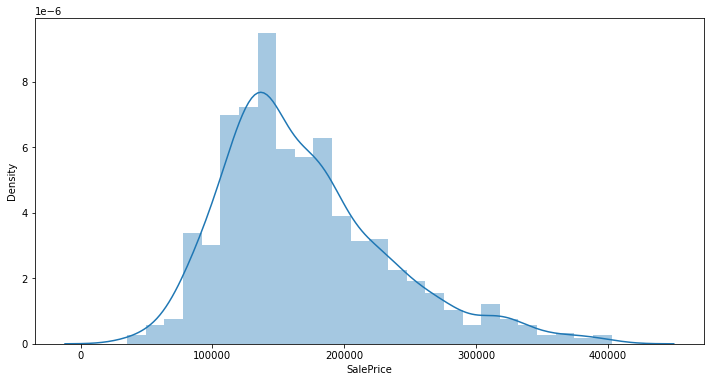

In [61]:
#checking distribution of Target varibale Sale price
plt.figure(figsize=(12,6))
sns.distplot(housing.SalePrice)
plt.show()

In [62]:
pd.options.display.max_rows=200
housing.isna().sum()

MSSubClass                   0
LotFrontage                  0
LotArea                      0
LotShape                     0
LandSlope                    0
OverallQual                  0
OverallCond                  0
YearBuilt                    0
YearRemodAdd                 0
MasVnrArea                   0
ExterQual                    0
ExterCond                    0
BsmtQual                    34
BsmtCond                     0
BsmtExposure                 0
BsmtFinType1                 0
BsmtFinSF1                   0
BsmtFinType2                 0
BsmtFinSF2                   0
BsmtUnfSF                    0
TotalBsmtSF                  0
HeatingQC                    0
CentralAir                   0
1stFlrSF                     0
2ndFlrSF                     0
LowQualFinSF                 0
GrLivArea                    0
BsmtFullBath                 0
FullBath                     0
HalfBath                     0
BedroomAbvGr                 0
KitchenAbvGr                 0
KitchenQ

In [63]:
housing.fillna(0,inplace=True)

##### Creting test train data

In [64]:
df_train,df_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=42)

In [65]:
#scaling numeric data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()

In [66]:
scaler.fit_transform(df_train)
scaler.fit_transform(df_test)

array([[-0.01271195,  0.61256372, -0.31264182, ..., -0.12365484,
         0.44559618, -0.31517891],
       [-0.23483652,  0.17147988,  0.558134  , ..., -0.12365484,
         0.44559618, -0.31517891],
       [-0.90121022,  0.64406971, -0.30767227, ..., -0.12365484,
        -2.2441844 ,  3.17280108],
       ...,
       [ 2.87490744,  0.9591296 ,  1.27651024, ..., -0.12365484,
         0.44559618, -0.31517891],
       [-0.90121022,  0.32900983, -0.1453336 , ..., -0.12365484,
         0.44559618, -0.31517891],
       [-0.90121022,  0.70708169, -0.17708351, ..., -0.12365484,
         0.44559618, -0.31517891]])

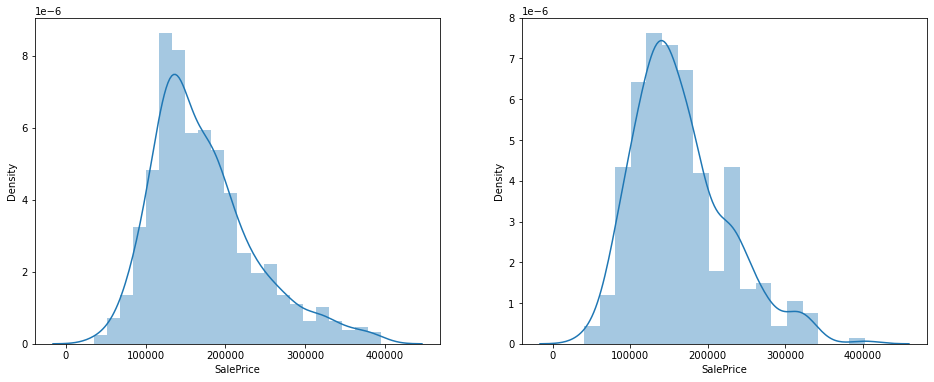

In [67]:
#checking sale price distribution after 
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice)
plt.subplot(1,2,2)
sns.distplot(df_test.SalePrice)
plt.show()

In [68]:
#splitting SalePrice from Independent variables 
X_train =  df_train.drop('SalePrice',axis=1)
X_test =  df_test.drop('SalePrice',axis=1)
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [69]:
# applying linaer regression and RFE to find optimal no of features

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [71]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [72]:
rfe = RFE(lm, 70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [73]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank'] 

In [74]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['OverallQual',
 'BsmtQual',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'Fireplaces',
 'GarageCars',
 'MSZoning_FV',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Gilbert',
 'Neighborhood_MeadowV',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_RRAn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Unf',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofMatl_Tar&Grv',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'MasVnrType_Stone',
 'Foundati

In [75]:
#checking the model again on RFE selected columns
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Using Lasso regression

In [76]:
from sklearn.linear_model import Lasso,Ridge

In [77]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)
y_train_pred = lm.predict(X_train)
print('r2_score_train : ',r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print('r2_score_test : ',r2_score(y_true=y_test,y_pred=y_test_pred))

r2_score_train :  0.8877810524635175
r2_score_test :  0.811448218240353


In [78]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -68865.641),
 ('LotFrontage', 11679.498),
 ('LotArea', 9355.677),
 ('LotShape', 15450.707),
 ('LandSlope', 19750.652),
 ('OverallQual', 10519.772),
 ('OverallCond', 14756.537),
 ('YearBuilt', 12061.04),
 ('YearRemodAdd', 15714.416),
 ('MasVnrArea', 8048.007),
 ('ExterQual', -9316.427),
 ('ExterCond', -8187.857),
 ('BsmtQual', 24039.942),
 ('BsmtCond', 12767.17),
 ('BsmtExposure', 32967.435),
 ('BsmtFinType1', -19518.555),
 ('BsmtFinSF1', 15209.379),
 ('BsmtFinType2', -9110.736),
 ('BsmtFinSF2', 42198.965),
 ('BsmtUnfSF', 29371.835),
 ('TotalBsmtSF', 66863.339),
 ('HeatingQC', 11814.975),
 ('CentralAir', 13658.016),
 ('1stFlrSF', 25819.379),
 ('2ndFlrSF', 15377.949),
 ('LowQualFinSF', 27531.566),
 ('GrLivArea', -17313.131),
 ('BsmtFullBath', 17281.122),
 ('FullBath', -9493.615),
 ('HalfBath', -8986.074),
 ('BedroomAbvGr', -51979.806),
 ('KitchenAbvGr', -38376.115),
 ('KitchenQual', -13092.029),
 ('TotRmsAbvGrd', -40590.413),
 ('Fireplaces', -11096.776),
 ('GarageYrBlt', 

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [80]:
# list of alphas to tune
alphas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


In [81]:
lasso = Lasso()
# cross validation
folds = KFold(n_splits=10,shuffle=True,random_state=42) 
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = alphas, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    9.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.035292,0.025747,0.004619,0.005411,0.0001,{'alpha': 0.0001},0.867158,0.847681,0.852998,0.854029,0.889746,0.869761,0.871226,0.888619,0.842016,0.869018,0.865225,0.015312,21,0.887984,0.89054,0.889472,0.889303,0.885181,0.888443,0.88792,0.886843,0.891665,0.888646,0.8886,0.001734
1,0.033267,0.028994,0.008052,0.008081,0.001,{'alpha': 0.001},0.867158,0.847681,0.852998,0.854029,0.889746,0.869761,0.871226,0.888619,0.842016,0.869018,0.865225,0.015312,20,0.887984,0.89054,0.889472,0.889303,0.885181,0.888443,0.88792,0.886843,0.891665,0.888646,0.8886,0.001734
2,0.036251,0.028136,0.002706,0.004980,0.01,{'alpha': 0.01},0.867160,0.847681,0.853000,0.854029,0.889747,0.869760,0.871225,0.888620,0.842014,0.869020,0.865225,0.015312,18,0.887984,0.89054,0.889472,0.889303,0.885181,0.888443,0.88792,0.886843,0.891665,0.888646,0.8886,0.001734
3,0.034639,0.034623,0.010939,0.007161,0.05,{'alpha': 0.05},0.867167,0.847682,0.853005,0.854029,0.889751,0.869753,0.871220,0.888624,0.842004,0.869032,0.865227,0.015315,17,0.887984,0.89054,0.889472,0.889303,0.885181,0.888443,0.88792,0.886843,0.891665,0.888646,0.8886,0.001734
4,0.033476,0.025183,0.004902,0.007506,0.1,{'alpha': 0.1},0.867176,0.847683,0.853012,0.854030,0.889756,0.869745,0.871214,0.888630,0.841993,0.869046,0.865229,0.015318,16,0.887984,0.89054,0.889472,0.889303,0.885181,0.888443,0.88792,0.886843,0.891665,0.888646,0.8886,0.001734


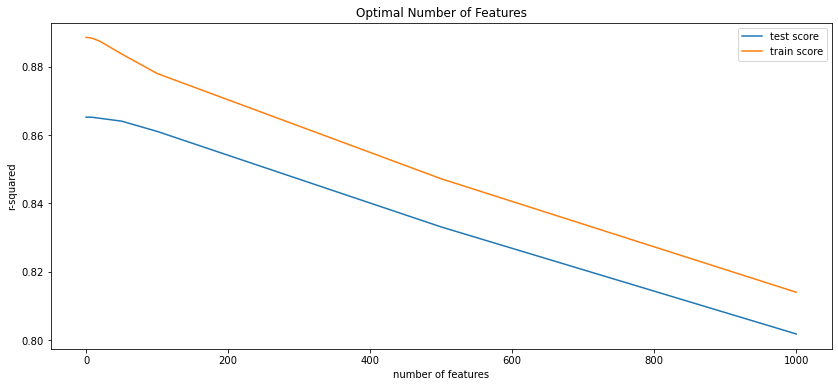

In [83]:
# plotting cv results
plt.figure(figsize=(14,6))
plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

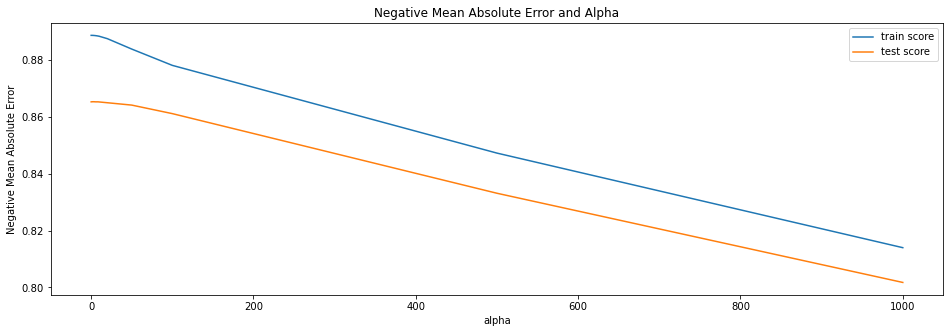

In [84]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [85]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 3.0}
0.8652688711044236


### Using Ridge Resgression

In [86]:
ridge = Ridge()
# cross validation
folds = KFold(n_splits=10,shuffle=True,random_state=42) 
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = alphas, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    6.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010282,0.008304,0.005718,0.005869,0.0001,{'alpha': 0.0001},0.867158,0.847682,0.852999,0.854029,0.890387,0.869761,0.871225,0.888619,0.842016,0.869018,0.865290,0.015415,14,0.887984,0.890540,0.889472,0.889303,0.885181,0.888443,0.887920,0.886843,0.891665,0.888646,0.888600,0.001734
1,0.009619,0.008200,0.007146,0.007037,0.001,{'alpha': 0.001},0.867162,0.847684,0.853012,0.854032,0.890391,0.869756,0.871222,0.888623,0.842019,0.869026,0.865293,0.015415,13,0.887984,0.890540,0.889472,0.889303,0.885181,0.888443,0.887920,0.886843,0.891665,0.888646,0.888600,0.001734
2,0.006539,0.007241,0.009722,0.007033,0.01,{'alpha': 0.01},0.867201,0.847705,0.853133,0.854064,0.890426,0.869709,0.871191,0.888663,0.842043,0.869101,0.865324,0.015408,12,0.887983,0.890540,0.889471,0.889303,0.885180,0.888443,0.887920,0.886843,0.891664,0.888645,0.888599,0.001734
3,0.008885,0.007096,0.006271,0.007073,0.05,{'alpha': 0.05},0.867364,0.847792,0.853652,0.854178,0.890569,0.869499,0.871053,0.888833,0.842149,0.869353,0.865444,0.015380,11,0.887974,0.890529,0.889459,0.889291,0.885171,0.888431,0.887909,0.886831,0.891651,0.888631,0.888588,0.001733
4,0.009860,0.008179,0.008507,0.007307,0.1,{'alpha': 0.1},0.867546,0.847886,0.854263,0.854272,0.890718,0.869234,0.870886,0.889028,0.842284,0.869547,0.865567,0.015345,10,0.887949,0.890499,0.889424,0.889259,0.885144,0.888397,0.887879,0.886799,0.891614,0.888593,0.888556,0.001731


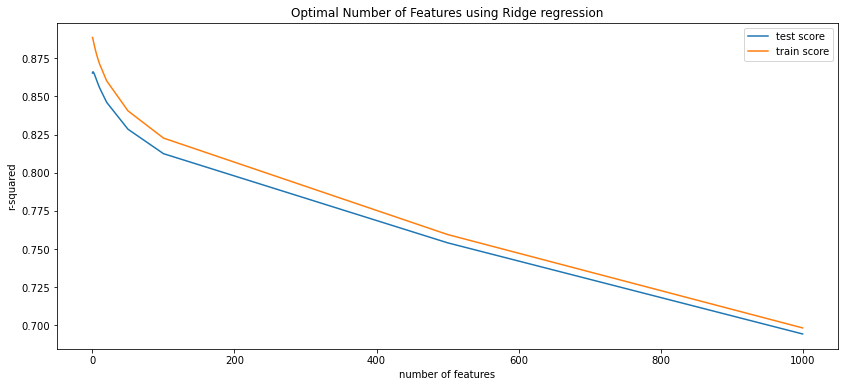

In [88]:
# plotting cv results
plt.figure(figsize=(14,6))
plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features using Ridge regression")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

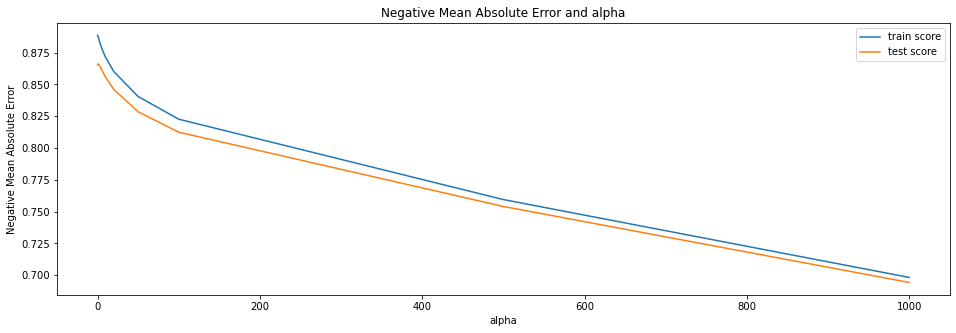

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [90]:
#checking the value of optimum number of parameters
model_cv.best_params_,model_cv.best_score_

({'alpha': 0.7}, 0.8660558214599776)

In [91]:
#prdictions using Ridge - 

ridge = Ridge(alpha=0.14) # from above ovseervations best alpha we got - 0.8
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('r2_score : Ridge - train :: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('r2_score : Ridge - test :: ', r2_score(y_true=y_test,y_pred=y_test_pred))
print ('RMSE :: ', mean_squared_error(y_test, y_test_pred))

r2_score : Ridge - train ::  0.8877077836116667
r2_score : Ridge - test ::  0.8148522051639706
RMSE ::  671864336.4359117


In [92]:
#prdictions using Lasso
lasso = Lasso(alpha=0.14)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)


print('r2_score : Lasso - train :: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('r2_score : Lasso - test :: ', r2_score(y_true=y_test,y_pred=y_test_pred))
print ('RMSE :: ', mean_squared_error(y_test, y_test_pred))

r2_score : Lasso - train ::  0.8877809823626274
r2_score : Lasso - test ::  0.8115261159952456
RMSE ::  683934049.1443518


In [93]:
#listing top 10 predictor variables using Lasso 
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
20,TotalBsmtSF,66846.637369
55,Alley_NoAlley,46109.787227
18,BsmtFinSF2,42192.683661
52,MSZoning_RL,41413.872643
14,BsmtExposure,32965.855139
51,MSZoning_RH,32344.929322
19,BsmtUnfSF,29363.746449
25,LowQualFinSF,27385.533683
44,3SsnPorch,26550.389572
23,1stFlrSF,25767.775458


In [94]:
#listing top 10 predictor variables using ridge 
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
20,TotalBsmtSF,65570.468107
18,BsmtFinSF2,41715.038710
55,Alley_NoAlley,39291.688328
52,MSZoning_RL,37852.063905
14,BsmtExposure,32622.485277
51,MSZoning_RH,30985.378671
19,BsmtUnfSF,29002.541143
23,1stFlrSF,24455.004697
25,LowQualFinSF,23909.443386
12,BsmtQual,22943.248632
